# Builder Locations

Generate a map of the united states using only census data, then overlay all zip codes where one or more specified builders are located.

Also make sure to look at the related notebooks named `home_prices.ipynb` and `housing_growth.ipynb`

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
# Get all locations in the United States
zip_df = pd.read_csv('../inputs/zip_codes.csv', dtype={'Zip Code': str}) # State (abbreviated and full), City, Zip Code, Lat, Long
zip_df.head()

,State,State Abbreviated,City,Zip Code,Latitude,Longitude
0,Alabama,AL,Abbeville,36310,31.5755,-85.2790
1,Alabama,AL,Abernant,35440,33.3110,-87.1898
2,Alabama,AL,Adamsville,35005,33.5884,-86.9597
3,Alabama,AL,Addison,35540,34.2056,-87.1948
4,Alabama,AL,Adger,35006,33.4343,-87.1675


In [6]:
# Get home builder locations in the United States
homes_df = pd.read_csv('../outputs/home_prices.csv')
homes_df['Zip Code'] = homes_df['Zip'].astype('str').str.rstrip('.0')
homes_df = homes_df.reindex(columns=['Brand', 'Zip Code'])
homes_df.head()

,Brand,Zip Code
0,1034 NE 72nd Street LLC,98115
1,1034 NE 72nd Street LLC,98115
2,1034 NE 72nd Street LLC,98115
3,13th Floor Homes,33319
4,13th Floor Homes,33404


In [7]:
# Separate builder locations from remaining locations
df = pd.merge(zip_df, homes_df, on='Zip Code', how='outer')
del zip_df # Free memory
del homes_df # Free memory
# Define the boundaries of the continental United States
bounds = { 'lat_min': 24.5, 'lat_max': 49.5, 'lon_min': -124.75, 'lon_max': -66.95 }
bounded_df = df[
    (df['Latitude'] >= bounds['lat_min']) &
    (df['Latitude'] <= bounds['lat_max']) &
    (df['Longitude'] >= bounds['lon_min']) &
    (df['Longitude'] <= bounds['lon_max'])
]
centex_df = df[
    (df['Brand'] == 'Centex Homes') &
    (df['Latitude'] >= bounds['lat_min']) &
    (df['Latitude'] <= bounds['lat_max']) &
    (df['Longitude'] >= bounds['lon_min']) &
    (df['Longitude'] <= bounds['lon_max'])
]
delwebb_df = df[
    (df['Brand'] == 'Del Webb') &
    (df['Latitude'] >= bounds['lat_min']) &
    (df['Latitude'] <= bounds['lat_max']) &
    (df['Longitude'] >= bounds['lon_min']) &
    (df['Longitude'] <= bounds['lon_max'])
]
pulte_df = df[
    (df['Brand'] == 'Pulte Homes') &
    (df['Latitude'] >= bounds['lat_min']) &
    (df['Latitude'] <= bounds['lat_max']) &
    (df['Longitude'] >= bounds['lon_min']) &
    (df['Longitude'] <= bounds['lon_max'])
]
# Filter the dataFrame to exclude rows with zip codes in the builder DataFrames
bounded_df = bounded_df[~bounded_df['Zip Code'].isin(centex_df['Zip Code'])]
bounded_df = bounded_df[~bounded_df['Zip Code'].isin(delwebb_df['Zip Code'])]
bounded_df = bounded_df[~bounded_df['Zip Code'].isin(pulte_df['Zip Code'])]
# Get locations where we should be building
locations_df = pd.read_csv('../outputs/housing_growth.csv')
locations_df = locations_df.sort_values(['% Difference', 'Predicted Occupied Housing Units'], ascending=False).reset_index(drop=True)
# Only recommend the top 10 locations (requires high population, and predicted continued growth)
min_population = 10000
max_recomendations = 10
recommended_locations_df = locations_df[(locations_df['Total Population'] >= min_population) & (locations_df['% Difference'] > 0)]
# Remove Hawaii and Alaska
recommended_locations_df = recommended_locations_df[
    (recommended_locations_df['Latitude'] >= bounds['lat_min']) &
    (recommended_locations_df['Latitude'] <= bounds['lat_max']) &
    (recommended_locations_df['Longitude'] >= bounds['lon_min']) &
    (recommended_locations_df['Longitude'] <= bounds['lon_max'])
]
recommended_locations_df = recommended_locations_df.head(max_recomendations)
recommended_locations_df = recommended_locations_df[['State', 'City', 'Latitude', 'Longitude']]
recommended_locations_df = recommended_locations_df.reset_index(drop=True)
recommended_locations_df.head(max_recomendations)

,State,City,Latitude,Longitude
0,California,Santa Cruz,36.9959,-122.0578
1,California,Soledad,36.4196,-121.3243
2,Ohio,Dayton,39.7238,-84.1854
3,New Hampshire,Durham,43.1174,-70.9197
4,Maryland,Ocean City,38.3365,-75.0849
5,Massachusetts,Nantucket,41.2725,-70.0932
6,California,Oxnard,34.1685,-119.1717
7,Pennsylvania,Villanova,40.0399,-75.3459
8,California,Santa Ana,33.7489,-117.9072
9,Colorado,Breckenridge,39.4753,-106.0225


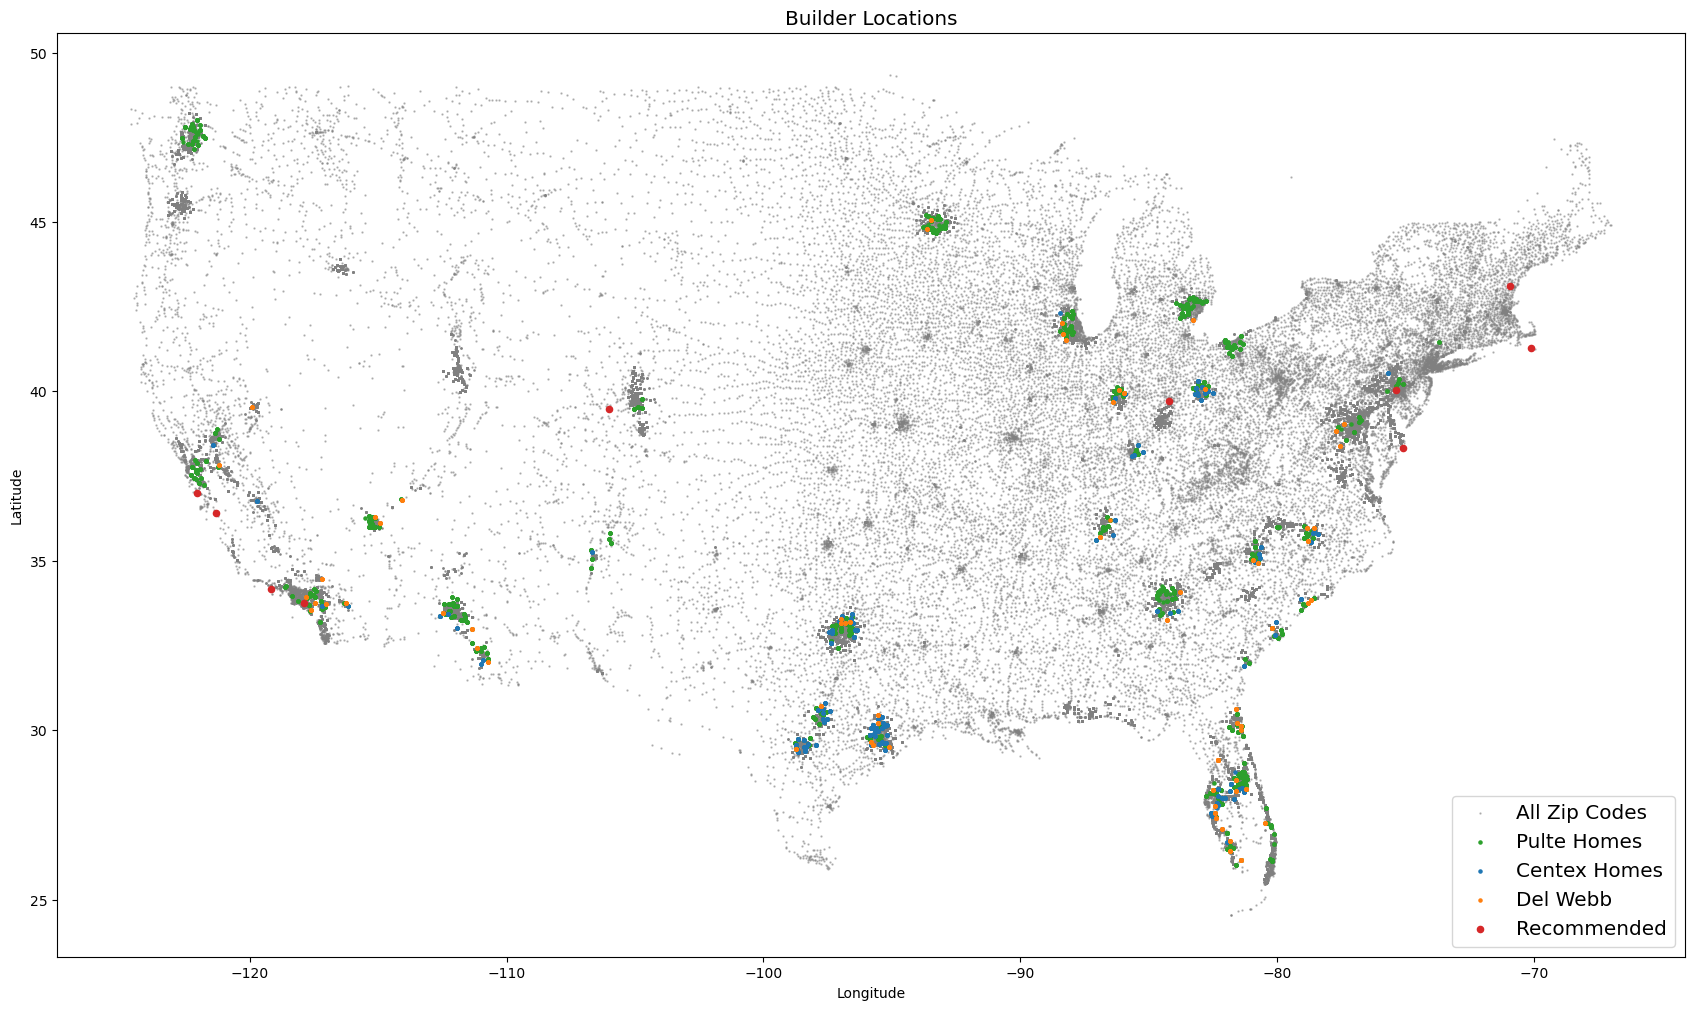

In [8]:
builder_dot_size = 20
plt.figure(figsize=(21,12))
plt.scatter(bounded_df['Longitude'],bounded_df['Latitude'], c='grey', marker='.', s=(builder_dot_size/10), alpha=0.5, label='All Zip Codes')
plt.scatter(pulte_df['Longitude'],pulte_df['Latitude'], c='C2', marker='.', s=builder_dot_size, label='Pulte Homes')
plt.scatter(centex_df['Longitude'],centex_df['Latitude'], c='C0', marker='.', s=builder_dot_size, label='Centex Homes')
plt.scatter(delwebb_df['Longitude'],delwebb_df['Latitude'], c='C1', marker='.', s=builder_dot_size, label='Del Webb')
plt.scatter(recommended_locations_df['Longitude'],recommended_locations_df['Latitude'], c='C3', marker='.', s=builder_dot_size*4, label='Recommended')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='lower right', fontsize='x-large')
plt.title("Builder Locations", fontsize='x-large')
plt.show()

In [9]:
# Only recommend the top 10 locations (requires high population, and predicted continued growth)
min_population = 10000
max_recomendations = 10
# Define the boundaries of Atlanta
bounds = { 'lat_min': 32.9146, 'lat_max': 34.5834, 'lon_min': -85.3031, 'lon_max': -83.4729 }
bounded_df = df[
    (df['Latitude'] >= bounds['lat_min']) &
    (df['Latitude'] <= bounds['lat_max']) &
    (df['Longitude'] >= bounds['lon_min']) &
    (df['Longitude'] <= bounds['lon_max'])
]
centex_df = df[
    (df['Brand'] == 'Centex Homes') &
    (df['Latitude'] >= bounds['lat_min']) &
    (df['Latitude'] <= bounds['lat_max']) &
    (df['Longitude'] >= bounds['lon_min']) &
    (df['Longitude'] <= bounds['lon_max'])
]
delwebb_df = df[
    (df['Brand'] == 'Del Webb') &
    (df['Latitude'] >= bounds['lat_min']) &
    (df['Latitude'] <= bounds['lat_max']) &
    (df['Longitude'] >= bounds['lon_min']) &
    (df['Longitude'] <= bounds['lon_max'])
]
pulte_df = df[
    (df['Brand'] == 'Pulte Homes') &
    (df['Latitude'] >= bounds['lat_min']) &
    (df['Latitude'] <= bounds['lat_max']) &
    (df['Longitude'] >= bounds['lon_min']) &
    (df['Longitude'] <= bounds['lon_max'])
]
# Filter the dataFrame to exclude rows with zip codes in the builder DataFrames
bounded_df = bounded_df[~bounded_df['Zip Code'].isin(centex_df['Zip Code'])]
bounded_df = bounded_df[~bounded_df['Zip Code'].isin(delwebb_df['Zip Code'])]
bounded_df = bounded_df[~bounded_df['Zip Code'].isin(pulte_df['Zip Code'])]
recommended_locations_df = locations_df[(locations_df['Total Population'] >= min_population) & (locations_df['% Difference'] > 0)]
recommended_locations_df = recommended_locations_df[
    (recommended_locations_df['Latitude'] >= bounds['lat_min']) &
    (recommended_locations_df['Latitude'] <= bounds['lat_max']) &
    (recommended_locations_df['Longitude'] >= bounds['lon_min']) &
    (recommended_locations_df['Longitude'] <= bounds['lon_max'])
]
# Filter the dataFrame to exclude rows with zip codes in the builder DataFrames
recommended_locations_df = recommended_locations_df[~recommended_locations_df['Zip Code'].isin(centex_df['Zip Code'])]
recommended_locations_df = recommended_locations_df[~recommended_locations_df['Zip Code'].isin(delwebb_df['Zip Code'])]
recommended_locations_df = recommended_locations_df[~recommended_locations_df['Zip Code'].isin(pulte_df['Zip Code'])]
recommended_locations_df = recommended_locations_df.head(max_recomendations)
recommended_locations_df = recommended_locations_df[['State', 'City', 'Latitude', 'Longitude']]
recommended_locations_df = recommended_locations_df.reset_index(drop=True)
recommended_locations_df.head(max_recomendations)

,State,City,Latitude,Longitude
0,Georgia,Clarkston,33.8101,-84.2388
1,Georgia,Gainesville,34.2591,-83.7716
2,Georgia,Atlanta,33.7683,-84.3935
3,Georgia,Morrow,33.5849,-84.3247
4,Georgia,Lawrenceville,33.9418,-84.0706
5,Georgia,Grayson,33.8901,-83.9632
6,Georgia,Buford,34.0797,-83.9308
7,Georgia,Lawrenceville,33.9367,-83.9573
8,Georgia,Gainesville,34.2723,-83.8793
9,Georgia,Atlanta,33.7561,-84.4255


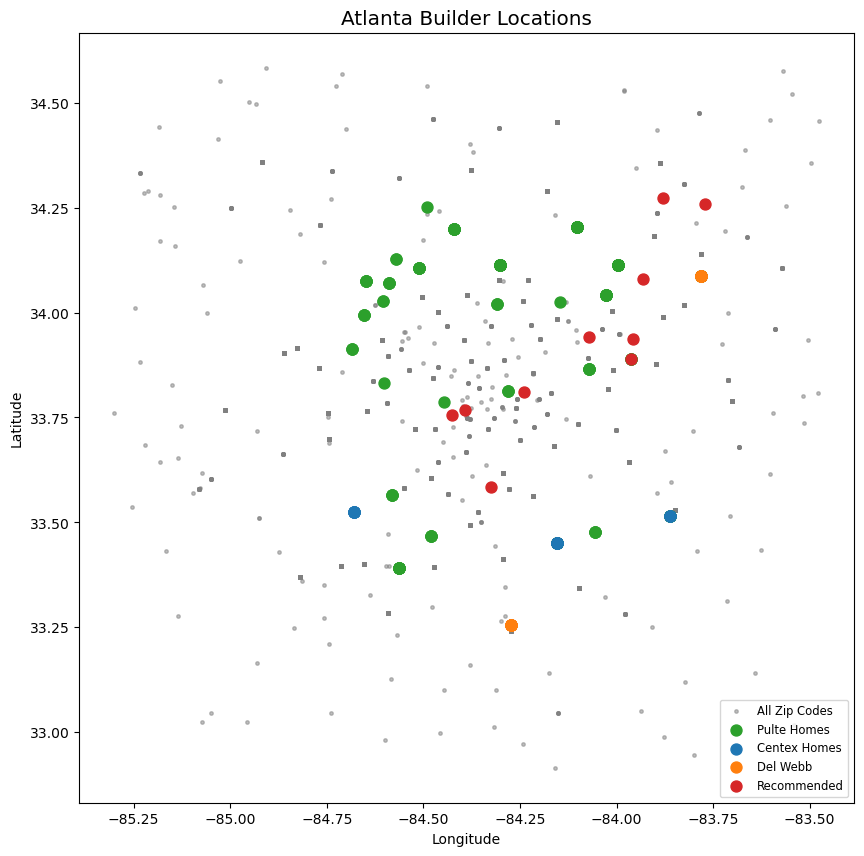

In [22]:
builder_dot_size = 250
plt.figure(figsize=(10,10))
plt.scatter(bounded_df['Longitude'],bounded_df['Latitude'], c='grey', marker='.', s=(builder_dot_size)/10, alpha=0.5, label='All Zip Codes')
plt.scatter(pulte_df['Longitude'],pulte_df['Latitude'], c='C2', marker='.', s=builder_dot_size, label='Pulte Homes')
plt.scatter(centex_df['Longitude'],centex_df['Latitude'], c='C0', marker='.', s=builder_dot_size, label='Centex Homes')
plt.scatter(delwebb_df['Longitude'],delwebb_df['Latitude'], c='C1', marker='.', s=builder_dot_size, label='Del Webb')
plt.scatter(recommended_locations_df['Longitude'],recommended_locations_df['Latitude'], c='C3', marker='.', s=builder_dot_size, label='Recommended')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='lower right', fontsize='small')
plt.title("Atlanta Builder Locations", fontsize='x-large')
plt.show()